In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import sys

sys.path.insert(0, '..\\CountsOutlierDetector')
from counts_outlier_detector import CountsOutlierDetector

In [2]:
# This notebook provides an example of running CountsOutlierDetector
# on a file from OpenML. The uses the 'abalone' dataset. The 
# detector checks up to six dimensions, and finds outliers up to 
# three dimensions. Some API calls are made to explain the outliers
# identified. 

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 10000

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


Examining subspaces of dimension 1
Examining subspaces of dimension 2
Examining subspaces of dimension 3
Examining subspaces of dimension 4
Examining subspaces of dimension 5
Examining subspaces of dimension 6


,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,True,True,True,True,1.077328,5.147235,4.97965,0.0,0.0,0.0,1.077328,5.530285,8.427101,8.427101,8.427101,8.427101,8.427101


,TOTAL SCORE,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
2407,9,1,2,1,0,1,1,1,1
985,8,2,2,1,0,1,1,0,1
2986,8,2,1,1,0,1,1,1,1
4110,8,2,1,1,0,1,1,1,1
4112,8,0,1,1,0,1,1,1,1


**Explanation row number**: 2407

**Total score**: 9

### Unusual values in column Sex (I), column Diameter (0.43: Med), column Whole_weight (1.411: Med)

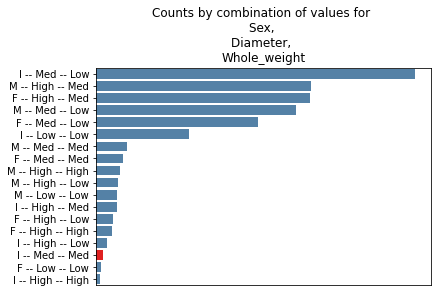

### Unusual values in column Length (0.625: High), column Diameter (0.43: Med), column Shucked_weight (0.572: Med)

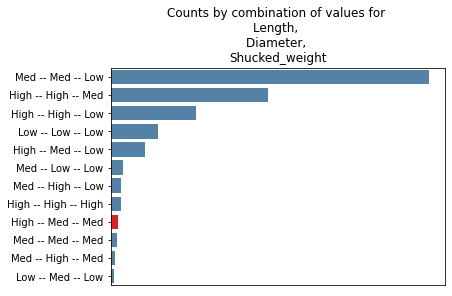

### Unusual values in column Length (0.625: High), column Diameter (0.43: Med), column Shell_weight (0.395: Med)

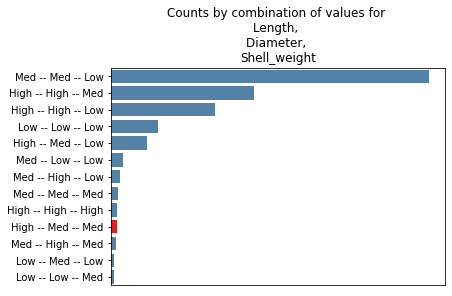

### Unusual values in column Diameter (0.43: Med), column Whole_weight (1.411: Med), column Shell_weight (0.395: Med)

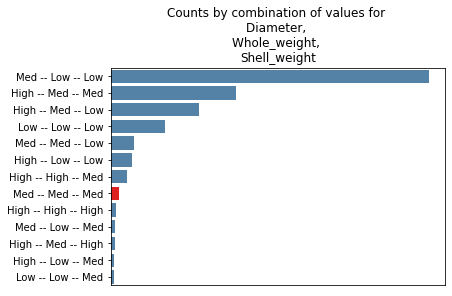

### Unusual values in column Diameter (0.43: Med), column Shucked_weight (0.572: Med), column Shell_weight (0.395: Med)

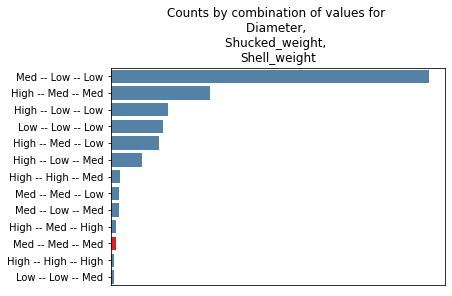

In [4]:
data = fetch_openml('abalone', version=1, parser='auto')
df = pd.DataFrame(data.data, columns=data.feature_names)
display(df.head())

# This provides an example of setting some parameters to non-default values,
# which can provide somewhat different results.
det = CountsOutlierDetector(n_bins=3, max_dimensions=6, threshold=0.25, verbose=True)
results = det.predict(df)
display(results['Flagged Summary'])

display(det.get_most_flagged_rows().head())
most_flagged = int(det.get_most_flagged_rows().index[0])
det.explain_row(most_flagged)

In [5]:
# To further explain the information above, it is possible to get the
# full set of counts for each set of features identified above. 

det.explain_features(['Diameter', 'Shucked_weight', 'Shell_weight'])

,Diameter,Shucked_weight,Shell_weight,Count
2,Med,Low,Low,2164
9,High,Med,Med,657
6,High,Low,Low,369
0,Low,Low,Low,336
8,High,Med,Low,307
7,High,Low,Med,197
11,High,High,Med,40
4,Med,Med,Low,37
3,Med,Low,Med,34
10,High,Med,High,18
